In [31]:
import warnings
warnings.filterwarnings('ignore')

In [32]:
from ucimlrepo import fetch_ucirepo 
  
# fetch dataset 
statlog_german_credit_data = fetch_ucirepo(id=144) 
  
# data (as pandas dataframes) 
X = statlog_german_credit_data.data.features 
y = statlog_german_credit_data.data.targets 
  
# metadata 
print(statlog_german_credit_data.metadata) 
  
# variable information 
print(statlog_german_credit_data.variables)

{'uci_id': 144, 'name': 'Statlog (German Credit Data)', 'repository_url': 'https://archive.ics.uci.edu/dataset/144/statlog+german+credit+data', 'data_url': 'https://archive.ics.uci.edu/static/public/144/data.csv', 'abstract': 'This dataset classifies people described by a set of attributes as good or bad credit risks. Comes in two formats (one all numeric). Also comes with a cost matrix', 'area': 'Social Science', 'tasks': ['Classification'], 'characteristics': ['Multivariate'], 'num_instances': 1000, 'num_features': 20, 'feature_types': ['Categorical', 'Integer'], 'demographics': ['Other', 'Marital Status', 'Age', 'Occupation'], 'target_col': ['class'], 'index_col': None, 'has_missing_values': 'no', 'missing_values_symbol': None, 'year_of_dataset_creation': 1994, 'last_updated': 'Thu Aug 10 2023', 'dataset_doi': '10.24432/C5NC77', 'creators': ['Hans Hofmann'], 'intro_paper': None, 'additional_info': {'summary': 'Two datasets are provided.  the original dataset, in the form provided by

In [33]:
X

,Attribute1,Attribute2,Attribute3,Attribute4,Attribute5,Attribute6,Attribute7,Attribute8,Attribute9,Attribute10,Attribute11,Attribute12,Attribute13,Attribute14,Attribute15,Attribute16,Attribute17,Attribute18,Attribute19,Attribute20
0,A11,6,A34,A43,1169,A65,A75,4,A93,A101,4,A121,67,A143,A152,2,A173,1,A192,A201
1,A12,48,A32,A43,5951,A61,A73,2,A92,A101,2,A121,22,A143,A152,1,A173,1,A191,A201
2,A14,12,A34,A46,2096,A61,A74,2,A93,A101,3,A121,49,A143,A152,1,A172,2,A191,A201
3,A11,42,A32,A42,7882,A61,A74,2,A93,A103,4,A122,45,A143,A153,1,A173,2,A191,A201
4,A11,24,A33,A40,4870,A61,A73,3,A93,A101,4,A124,53,A143,A153,2,A173,2,A191,A201
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,A14,12,A32,A42,1736,A61,A74,3,A92,A101,4,A121,31,A143,A152,1,A172,1,A191,A201
996,A11,30,A32,A41,3857,A61,A73,4,A91,A101,4,A122,40,A143,A152,1,A174,1,A192,A201
997,A14,12,A32,A43,804,A61,A75,4,A93,A101,4,A123,38,A143,A152,1,A173,1,A191,A201
998,A11,45,A32,A43,1845,A61,A73,4,A93,A101,4,A124,23,A143,A153,1,A173,1,A192,A201


In [34]:
X.isnull().sum()

Attribute1     0
Attribute2     0
Attribute3     0
Attribute4     0
Attribute5     0
Attribute6     0
Attribute7     0
Attribute8     0
Attribute9     0
Attribute10    0
Attribute11    0
Attribute12    0
Attribute13    0
Attribute14    0
Attribute15    0
Attribute16    0
Attribute17    0
Attribute18    0
Attribute19    0
Attribute20    0
dtype: int64

In [35]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 20 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Attribute1   1000 non-null   object
 1   Attribute2   1000 non-null   int64 
 2   Attribute3   1000 non-null   object
 3   Attribute4   1000 non-null   object
 4   Attribute5   1000 non-null   int64 
 5   Attribute6   1000 non-null   object
 6   Attribute7   1000 non-null   object
 7   Attribute8   1000 non-null   int64 
 8   Attribute9   1000 non-null   object
 9   Attribute10  1000 non-null   object
 10  Attribute11  1000 non-null   int64 
 11  Attribute12  1000 non-null   object
 12  Attribute13  1000 non-null   int64 
 13  Attribute14  1000 non-null   object
 14  Attribute15  1000 non-null   object
 15  Attribute16  1000 non-null   int64 
 16  Attribute17  1000 non-null   object
 17  Attribute18  1000 non-null   int64 
 18  Attribute19  1000 non-null   object
 19  Attribute20  1000 non-null  

In [36]:
X.select_dtypes(include=['object']).columns

Index(['Attribute1', 'Attribute3', 'Attribute4', 'Attribute6', 'Attribute7',
       'Attribute9', 'Attribute10', 'Attribute12', 'Attribute14',
       'Attribute15', 'Attribute17', 'Attribute19', 'Attribute20'],
      dtype='object')

In [37]:
cat_col =['Attribute1', 'Attribute3', 'Attribute4', 'Attribute6', 'Attribute7',
       'Attribute9', 'Attribute10', 'Attribute12', 'Attribute14',
       'Attribute15', 'Attribute17', 'Attribute19', 'Attribute20']
for i in cat_col:
  print(i,"-->",X[i].unique())

Attribute1 --> ['A11' 'A12' 'A14' 'A13']
Attribute3 --> ['A34' 'A32' 'A33' 'A30' 'A31']
Attribute4 --> ['A43' 'A46' 'A42' 'A40' 'A41' 'A49' 'A44' 'A45' 'A410' 'A48']
Attribute6 --> ['A65' 'A61' 'A63' 'A64' 'A62']
Attribute7 --> ['A75' 'A73' 'A74' 'A71' 'A72']
Attribute9 --> ['A93' 'A92' 'A91' 'A94']
Attribute10 --> ['A101' 'A103' 'A102']
Attribute12 --> ['A121' 'A122' 'A124' 'A123']
Attribute14 --> ['A143' 'A141' 'A142']
Attribute15 --> ['A152' 'A153' 'A151']
Attribute17 --> ['A173' 'A172' 'A174' 'A171']
Attribute19 --> ['A192' 'A191']
Attribute20 --> ['A201' 'A202']


In [38]:
from sklearn.preprocessing import  LabelEncoder
le = LabelEncoder()
for i in cat_col:
  X[i] = le.fit_transform(X[i])

In [39]:
X.head()

,Attribute1,Attribute2,Attribute3,Attribute4,Attribute5,Attribute6,Attribute7,Attribute8,Attribute9,Attribute10,Attribute11,Attribute12,Attribute13,Attribute14,Attribute15,Attribute16,Attribute17,Attribute18,Attribute19,Attribute20
0,0,6,4,4,1169,4,4,4,2,0,4,0,67,2,1,2,2,1,1,0
1,1,48,2,4,5951,0,2,2,1,0,2,0,22,2,1,1,2,1,0,0
2,3,12,4,7,2096,0,3,2,2,0,3,0,49,2,1,1,1,2,0,0
3,0,42,2,3,7882,0,3,2,2,2,4,1,45,2,2,1,2,2,0,0
4,0,24,3,0,4870,0,2,3,2,0,4,3,53,2,2,2,2,2,0,0


In [40]:
from sklearn.preprocessing import StandardScaler

st_scale = StandardScaler()
scaled_x = st_scale.fit_transform(X)


In [41]:
import pickle
with open("scaled_data.pkl", 'wb') as f:
    pickle.dump(scaled_x, f)


In [42]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(scaled_x,y)

In [43]:
print(f"x_train shape (x_train.shape)")
print(f"x_train shape (x_test.shape)")
print(f"y_train shape (y_train.shape)")
print(f"y_test shape (y_test.shape)")

x_train shape (x_train.shape)
x_train shape (x_test.shape)
y_train shape (y_train.shape)
y_test shape (y_test.shape)


In [44]:
from sklearn.svm import SVC
svm_poly = SVC(kernel='linear')
svm_poly.fit(x_train,y_train)

,C,1.0
,kernel,'linear'
,degree,3
,gamma,'scale'
,coef0,0.0
,shrinking,True
,probability,False
,tol,0.001
,cache_size,200
,class_weight,None
,verbose,False


In [45]:
with open("SVM_Poly_Model.pkl",'wb') as f:
  pickle.dump(svm_poly,f)

In [46]:
svm_pred = svm_poly.predict(x_test)
svm_pred[:10]

array([2, 1, 1, 1, 1, 1, 1, 2, 1, 2])

In [47]:
from sklearn.metrics import accuracy_score,precision_score,recall_score,confusion_matrix
print(f"Accuracy_score {accuracy_score(y_test,svm_pred)}")
print(f"Precision_score {precision_score(y_test,svm_pred)}")
print(f"Recall_score {recall_score(y_test,svm_pred)}")

Accuracy_score 0.776
Precision_score 0.788659793814433
Recall_score 0.9107142857142857


In [48]:
pip install seaborn

Note: you may need to restart the kernel to use updated packages.


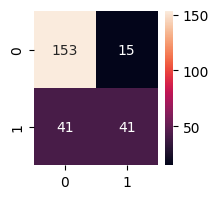

In [49]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix  

plt.figure(figsize=(2,2))
sns.heatmap(confusion_matrix(y_test, svm_pred), annot=True, fmt='d')
plt.show()
